<a href="https://colab.research.google.com/github/pranayar/Unsupervised-Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

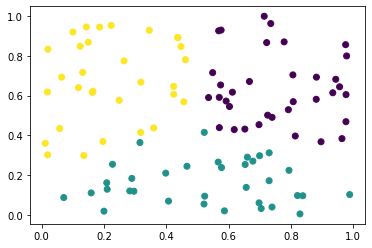

In [24]:
# K means clustering
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data= np.loadtxt("data.csv",
                 delimiter=",", dtype=float)


# Create a k-means model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Plot the data points colored by their cluster assignment
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()


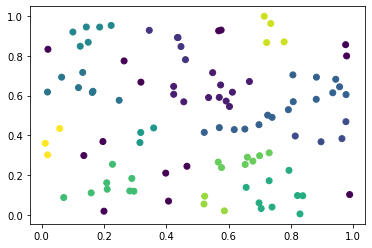

In [30]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
import numpy as np

data= np.loadtxt("data.csv",
                 delimiter=",", dtype=float)


# Create a DBSCAN model with a minimum of 3 points per cluster and a distance threshold of 0.1
dbscan = DBSCAN(eps=0.1, min_samples=3)

# Fit the model to the data
dbscan.fit(data)

# Get the cluster assignments for each data point
labels = dbscan.labels_
import matplotlib.pyplot as plt

# Plot the data points colored by their cluster assignment
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()


Rule: item5 -> item3
Support: 0.21212121212121213
Confidence: 0.5384615384615385
Rule: item8 -> item4
Support: 0.21212121212121213
Confidence: 0.5


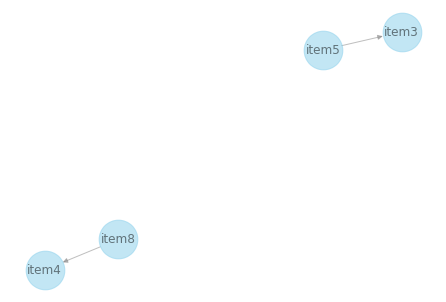

In [51]:
# Apriori assosciation
from apyori import apriori
import pandas as pd

data = pd.read_csv("apriori.csv")

# Convert the data into a list of lists, where each list represents a transaction
transactions = []
for i in range(0, data.shape[0]):
    transactions.append([str(data.values[i,j]) for j in range(0, data.shape[1])])

# Apply the Apriori algorithm with a minimum support of 0.1 and a minimum confidence of 0.5
rules = apriori(transactions, min_support = 0.1, min_confidence = 0.5)

# Print the generated rules
results = list(rules)
for item in results:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))


import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph to represent the association rules
G = nx.DiGraph()

# Add nodes to the graph for each item in the association rules
for item in results:
    pair = item[0]
    items = [x for x in pair]
    G.add_nodes_from(items)

# Add edges to the graph for each association rule
for item in results:
    pair = item[0]
    items = [x for x in pair]
    G.add_edge(items[0], items[1])

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, alpha=0.5, arrows=True)
plt.show()

